In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load images from 'eigen faces' directory
directory = 'C://Users//owner//shipsnet//shipsnet'
image_files = os.listdir(directory)

images = []
for file in image_files:
    if file.endswith('.jpg') or file.endswith('.png'):
        img_path = os.path.join(directory, file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Error loading image: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (32, 32))
        images.append(img)

# Check if images were loaded
if not images:
    print("No valid images found in the directory.")
    exit()

# Convert images list to a NumPy array
images = np.array(images)

# Split the data into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# Normalize pixel values between 0 and 1 for both train and test sets
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Model compilation and training...
# Reconstruction and visualization code...


In [19]:
encoding_dim = 10  # This is the size of our encoded representations
# Encoder
input_img = Input(shape=(32, 32, 3))  # Input shape for CIFAR-10 RGB images
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output shape for RGB images
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
decoder = Model(encoded, decoded)  # Decoder model
encoded_input = Input(shape=(8, 8, 16))  # Adjust shape based on the encoded representation
decoder_output = decoder(encoded_input)
decoder_model = Model(encoded_input, decoder_output)


Epoch 1/5
25/25 [==============================] - 3s 109ms/step - loss: 0.6445
Epoch 2/5
25/25 [==============================] - 3s 111ms/step - loss: 0.6287
Epoch 3/5
25/25 [==============================] - 3s 107ms/step - loss: 0.6267
Epoch 4/5
25/25 [==============================] - 3s 107ms/step - loss: 0.6260
Epoch 5/5
25/25 [==============================] - 0s 4ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

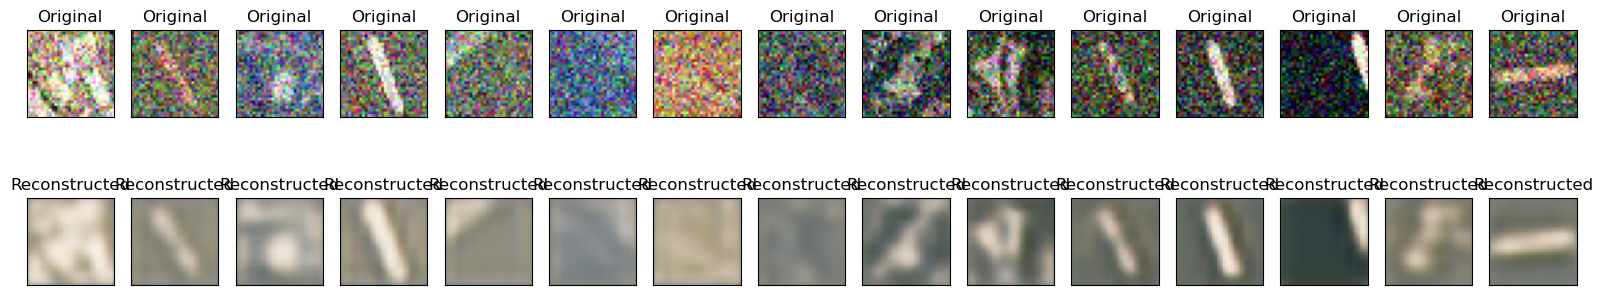

In [25]:
noise_factor = 0.2  # Adjust the noise factor as needed
noisy_train_images = add_gaussian_noise(train_images, noise_factor)
noisy_test_images = add_gaussian_noise(test_images, noise_factor)

# Model compilation and training remain unchanged
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(noisy_train_images, train_images, epochs=5, batch_size=128, shuffle=True)

# Reconstruction using the trained autoencoder
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder_model.predict(encoded_imgs)
# Plotting the original and reconstructed images
n = min(15, len(test_images))
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_test_images[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()

In [22]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(train_images, train_images, epochs=5, batch_size=128, shuffle=True)


Epoch 1/5
25/25 [==============================] - 3s 108ms/step - loss: 0.6480
Epoch 2/5
25/25 [==============================] - 3s 136ms/step - loss: 0.6292
Epoch 3/5
25/25 [==============================] - 3s 127ms/step - loss: 0.6268
Epoch 4/5
25/25 [==============================] - 3s 123ms/step - loss: 0.6258
Epoch 5/5
25/25 [==============================] - 3s 105ms/step - loss: 0.6251


25/25 [==============================] - 0s 4ms/step


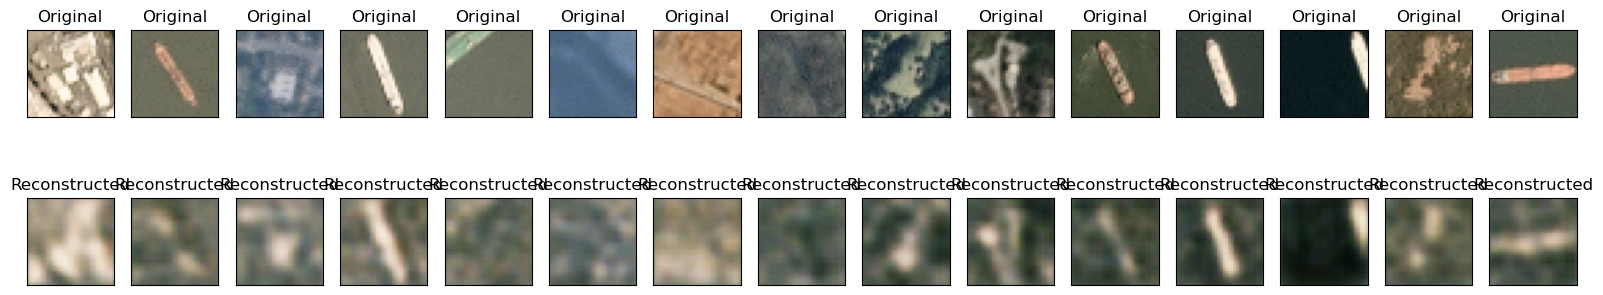

In [23]:
# Obtain encoded representations for the images
encoded_imgs = encoder.predict(test_images)

# Add Gaussian noise to encoded representations
noise_factor = 0.1  # Adjust the noise factor as needed
noisy_encoded_imgs = add_gaussian_noise(encoded_imgs, noise_factor)

# Decode the noisy encoded representations
decoded_imgs = decoder_model.predict(noisy_encoded_imgs)

# Plotting the original and reconstructed images
n = min(15, len(test_images))  # Adjust if the number of images is less than 15
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Original")

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title("Reconstructed")
plt.show()
